# Tutorial 35: Gini Mean Difference (GMD) Optimization

Gini Mean Difference (GMD) 최적화는 포트폴리오의 리스크를 측정하기 위해 전통적인 분산 대신 Gini Mean Difference를 사용하는 포트폴리오 최적화 기법입니다. GMD는 자산 수익률의 변동성을 측정하는 데 사용되며, 특히 리스크의 비대칭성을 더 잘 반영할 수 있습니다. 아래에서는 GMD 최적화에 대해 자세히 설명하겠습니다.

### Gini Mean Difference (GMD)란?

Gini Mean Difference는 다음과 같이 정의됩니다:

$$ GMD = \frac{2}{n(n-1)} \sum_{i=1}^{n} \sum_{j=i+1}^{n} |r_i - r_j| $$

여기서 $ r_i $와 $ r_j $는 자산의 수익률이며, $ n $은 수익률의 수입니다. GMD는 모든 수익률 쌍의 절대 차이의 평균을 측정하여 변동성을 계산합니다.

### GMD의 장점

1. **비대칭성 고려**: GMD는 리스크의 비대칭성을 반영하여, 수익률 분포의 꼬리 부분을 더 잘 다룰 수 있습니다.
2. **강건성**: GMD는 분산보다 이상치(outlier)에 덜 민감합니다.
3. **해석 용이성**: GMD는 수익률의 절대 차이의 평균으로 해석할 수 있어 직관적입니다.

### GMD를 사용한 포트폴리오 최적화

GMD를 사용한 포트폴리오 최적화는 다음과 같은 형태를 취할 수 있습니다:

1. **목표 함수 (Objective Function)**:
   $$ \min_w \, \text{GMD}(w) $$
   여기서 $ w $는 포트폴리오 가중치 벡터입니다.

2. **제약 조건 (Constraints)**:
   - 가중치의 합은 1이어야 합니다:
     $$ \sum_{i=1}^{n} w_i = 1 $$
   - 각 자산의 가중치는 특정 범위 내에 있어야 합니다:
     $$ l_i \leq w_i \leq u_i $$

### 예제 코드

아래는 `riskfolio` 라이브러리를 사용하여 GMD 최적화를 수행하는 예제 코드입니다:

```python
import numpy as np
import pandas as pd
import riskfolio as rp

# 예시 데이터 생성
np.random.seed(42)
Y = np.random.randn(100, 10)  # 100개의 샘플과 10개의 자산
asset_names = [f'Asset {i}' for i in range(1, 11)]
returns = pd.DataFrame(Y, columns=asset_names)

# 포트폴리오 객체 생성
port = rp.Portfolio(returns=returns)

# 기대 수익률과 공분산 행렬 계산
method_mu = 'hist'
method_cov = 'hist'
port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# GMD 최적화
model = 'Classic'
rm = 'GMD'  # Gini Mean Difference를 리스크 측정치로 사용
obj = 'MinRisk'
hist = True
rf = 0  # 무위험 이자율
l = 0  # 위험 회피 계수 (유틸리티 목표 함수에서만 사용)

# 최적 포트폴리오 계산
w_gmd = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

# 결과 출력
print("Optimal weights using GMD:\n", w_gmd.T)
```

### 코드 설명

1. **데이터 생성**:
   ```python
   np.random.seed(42)
   Y = np.random.randn(100, 10)
   asset_names = [f'Asset {i}' for i in range(1, 11)]
   returns = pd.DataFrame(Y, columns=asset_names)
   ```

   - 예시 데이터를 생성하고 자산 이름을 설정합니다.

2. **포트폴리오 객체 생성 및 통계 계산**:
   ```python
   port = rp.Portfolio(returns=returns)
   method_mu = 'hist'
   method_cov = 'hist'
   port.assets_stats(method_mu=method_mu, method_cov=method_cov)
   ```

   - `Portfolio` 객체를 생성하고, 자산의 기대 수익률과 공분산 행렬을 계산합니다.

3. **GMD 최적화**:
   ```python
   model = 'Classic'
   rm = 'GMD'
   obj = 'MinRisk'
   hist = True
   rf = 0
   l = 0

   w_gmd = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
   ```

   - GMD를 리스크 측정치로 사용하여 포트폴리오 최적화를 수행합니다.
   - `model='Classic'`: 클래식 모델을 사용합니다.
   - `rm='GMD'`: Gini Mean Difference를 리스크 측정치로 사용합니다.
   - `obj='MinRisk'`: 리스크 최소화를 목표로 설정합니다.
   - `hist=True`: 역사적 데이터를 사용합니다.
   - `rf=0`: 무위험 이자율을 0으로 설정합니다.
   - `l=0`: 위험 회피 계수를 설정합니다.

4. **결과 출력**:
   ```python
   print("Optimal weights using GMD:\n", w_gmd.T)
   ```

   - 최적화된 포트폴리오 가중치를 출력합니다.

### 결론

Gini Mean Difference (GMD) 최적화는 포트폴리오의 리스크를 측정하기 위해 전통적인 분산 대신 GMD를 사용하는 방법입니다. GMD는 리스크의 비대칭성을 더 잘 반영할 수 있으며, 포트폴리오 최적화에서 이상치에 덜 민감한 견고한 대안을 제공합니다. 이를 통해 투자자는 보다 안정적이고 효율적인 포트폴리오를 구성할 수 있습니다.

## 1. Downloading the data:

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%%**********************]  25 of 25 completed


In [2]:
# Calculating returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-2.0257%,0.4057%,0.4035%,1.9693%,0.0180%,0.9305%,0.3678%,0.5783%,0.9482%,-1.1953%,...,1.5881%,0.0212%,2.8236%,0.9758%,0.6987%,1.7539%,-0.1729%,0.2409%,1.3735%,-1.0857%
2016-01-06,-11.4863%,-1.5879%,0.2411%,-1.7557%,-0.7727%,-1.2473%,-0.1736%,-1.1239%,-3.5867%,-0.9551%,...,0.5547%,0.0212%,0.1592%,-1.5647%,0.3108%,-1.0155%,-0.7653%,-3.0048%,-0.9034%,-2.9144%
2016-01-07,-5.1389%,-4.1922%,-1.6573%,-2.7699%,-1.1047%,-1.9770%,-1.2207%,-0.8855%,-4.6059%,-2.5394%,...,-2.2066%,-3.0309%,-1.0410%,-3.1557%,-1.6148%,-0.2700%,-2.2844%,-2.0570%,-0.5492%,-3.0019%
2016-01-08,0.2736%,-2.2705%,-1.6037%,-2.5425%,0.1099%,-0.2241%,0.5706%,-1.6402%,-1.7642%,-0.1649%,...,-0.1538%,-1.1366%,-0.7308%,-0.1448%,0.0895%,-3.3839%,-0.1117%,-1.1387%,-0.9719%,-1.1254%
2016-01-11,-4.3383%,0.1692%,-1.6851%,-1.0215%,0.0915%,-1.1791%,0.5674%,0.5287%,0.6616%,0.0330%,...,1.6435%,0.0000%,0.9869%,-0.1451%,1.2224%,1.4570%,0.5367%,-0.4607%,0.5800%,-1.9919%


## 2. Estimating Mean GMD Portfolios

### GMD 모델 설명

Gini Mean Difference (GMD) 모델은 Yitzhaki(1982)가 제안했지만, 변수와 제약 조건의 수가 관측치 수에 비례하여 증가하는 복잡성 때문에 실무자들 사이에서 인기를 얻지 못했습니다. 그러나 Cajas(2021)는 Chassein과 Goerigk(2015)가 제안한 단조 가중치에 대한 정렬 가중 평균(OWA) 연산자 최적화 모델을 기반으로 대안적인 재구성을 제안했습니다. 이 재구성은 Riskfolio-Lib에 구현되어 있어 더 효율적입니다.

GMD를 최적화하는 데는 MOSEK를 사용하는 것이 좋습니다. 이는 모델이 사용하는 제약 조건과 변수의 수 때문에 더 많은 계산 능력을 필요로 하기 때문입니다.

### MOSEK 설치 지침

MOSEK를 설치하려면 아래 링크를 참고하세요. Anaconda를 사용하는 것이 좋습니다. 또한 라이선스가 필요하며, 학술용 라이선스를 요청하는 것을 권장합니다.

- [MOSEK 설치 지침](https://www.mosek.com/products/academic-licenses/)

### GMD 최적화 예제 코드

다음은 Riskfolio-Lib를 사용하여 GMD 모델을 최적화하는 예제 코드입니다. MOSEK를 설치하고 라이선스를 활성화한 후 실행할 수 있습니다.

```python
import numpy as np
import pandas as pd
import riskfolio as rp

# 예시 데이터 생성
np.random.seed(42)
Y = np.random.randn(100, 10)  # 100개의 샘플과 10개의 자산
asset_names = [f'Asset {i}' for i in range(1, 11)]
returns = pd.DataFrame(Y, columns=asset_names)

# 포트폴리오 객체 생성
port = rp.Portfolio(returns=returns)

# 기대 수익률과 공분산 행렬 계산
method_mu = 'hist'
method_cov = 'hist'
port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# GMD 최적화
model = 'Classic'
rm = 'GMD'  # Gini Mean Difference를 리스크 측정치로 사용
obj = 'MinRisk'
hist = True
rf = 0  # 무위험 이자율
l = 0  # 위험 회피 계수 (유틸리티 목표 함수에서만 사용)

# MOSEK 솔버를 사용한 최적 포트폴리오 계산
w_gmd = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist, solvers=['MOSEK'])

# 결과 출력
print("Optimal weights using GMD with MOSEK:\n", w_gmd.T)
```

### 코드 설명

1. **데이터 생성**:
   ```python
   np.random.seed(42)
   Y = np.random.randn(100, 10)
   asset_names = [f'Asset {i}' for i in range(1, 11)]
   returns = pd.DataFrame(Y, columns=asset_names)
   ```

   - 예시 데이터를 생성하고 자산 이름을 설정합니다.

2. **포트폴리오 객체 생성 및 통계 계산**:
   ```python
   port = rp.Portfolio(returns=returns)
   method_mu = 'hist'
   method_cov = 'hist'
   port.assets_stats(method_mu=method_mu, method_cov=method_cov)
   ```

   - `Portfolio` 객체를 생성하고, 자산의 기대 수익률과 공분산 행렬을 계산합니다.

3. **GMD 최적화**:
   ```python
   model = 'Classic'
   rm = 'GMD'
   obj = 'MinRisk'
   hist = True
   rf = 0
   l = 0

   w_gmd = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist, solvers=['MOSEK'])
   ```

   - GMD를 리스크 측정치로 사용하여 포트폴리오 최적화를 수행합니다.
   - `solvers=['MOSEK']`: MOSEK 솔버를 사용하여 최적화를 수행합니다.

4. **결과 출력**:
   ```python
   print("Optimal weights using GMD with MOSEK:\n", w_gmd.T)
   ```

   - 최적화된 포트폴리오 가중치를 출력합니다.

### 결론

Gini Mean Difference (GMD) 모델은 포트폴리오 리스크 측정에 전통적인 분산 대신 GMD를 사용합니다. Cajas(2021)는 OWA 연산자 최적화 모델을 기반으로 GMD 모델을 재구성하여 효율성을 높였습니다. GMD 최적화를 수행하는 데는 MOSEK 솔버를 사용하는 것이 좋습니다. 이는 Riskfolio-Lib에서 GMD 최적화를 수행하는 데 필요한 계산 능력을 제공하기 때문입니다.

### 2.1 Calculating the portfolio that optimize return/GMD ratio.

In [3]:
import riskfolio as rp
import mosek

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimum portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# Estimate optimal portfolio:

port.solvers = ['MOSEK'] # It is recommended to use mosek when optimizing GMD
port.sol_params = {'MOSEK': {'mosek_params': {mosek.iparam.num_threads: 2}}}

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'GMD' # Risk measure used, this time will be GMD
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,6.2951%,10.3165%,0.0000%,0.0000%,6.6849%,0.0000%,3.3053%,0.0000%,0.0000%,...,11.9209%,0.0000%,0.0000%,0.0000%,0.0000%,6.2955%,0.0000%,0.0000%,4.5181%,0.0000%


이 코드는 Riskfolio 라이브러리를 사용하여 Gini Mean Difference (GMD) 리스크 측정치를 사용하는 포트폴리오 최적화를 수행하는 예제입니다. MOSEK 솔버를 사용하여 최적화를 수행합니다. 각 단계별로 코드를 설명하겠습니다.

### 단계별 코드 설명

1. **필요한 라이브러리 임포트**:
   ```python
   import riskfolio as rp
   import mosek
   ```

   - `riskfolio` 및 `mosek` 라이브러리를 임포트합니다.

2. **포트폴리오 객체 생성**:
   ```python
   port = rp.Portfolio(returns=Y)
   ```

   - `rp.Portfolio` 클래스를 사용하여 포트폴리오 객체를 생성합니다.
   - `returns=Y`: 자산의 역사적 수익률 데이터 `Y`를 사용합니다.

3. **기대 수익률 및 공분산 행렬 추정**:
   ```python
   method_mu='hist'  # 역사적 데이터를 사용하여 기대 수익률 추정
   method_cov='hist'  # 역사적 데이터를 사용하여 공분산 행렬 추정

   port.assets_stats(method_mu=method_mu, method_cov=method_cov)
   ```

   - `method_mu='hist'`: 역사적 데이터를 기반으로 기대 수익률을 추정합니다.
   - `method_cov='hist'`: 역사적 데이터를 기반으로 공분산 행렬을 추정합니다.
   - `port.assets_stats` 함수는 지정된 방법에 따라 자산의 통계를 계산합니다.

4. **MOSEK 솔버 설정**:
   ```python
   port.solvers = ['MOSEK']  # 최적화를 위해 MOSEK 솔버를 사용
   port.sol_params = {'MOSEK': {'mosek_params': {mosek.iparam.num_threads: 2}}}
   ```

   - `port.solvers = ['MOSEK']`: MOSEK 솔버를 사용하여 최적화를 수행하도록 설정합니다.
   - `port.sol_params = {'MOSEK': {'mosek_params': {mosek.iparam.num_threads: 2}}}`: MOSEK 솔버 매개변수를 설정하여 최적화에 사용할 스레드 수를 2로 설정합니다.

5. **최적화 매개변수 설정**:
   ```python
   model='Classic'  # 사용할 모델: Classic (historical), BL (Black Litterman), FM (Factor Model)
   rm = 'GMD'  # 위험 측정치: GMD 사용
   obj = 'Sharpe'  # 목표 함수: Sharpe 비율 최대화
   hist = True  # 역사적 시나리오 사용
   rf = 0  # 무위험 이자율
   l = 0  # 위험 회피 계수 (유틸리티 목표 함수에서만 사용)
   ```

   - `model='Classic'`: 클래식 모델을 사용합니다.
   - `rm='GMD'`: Gini Mean Difference를 위험 측정치로 사용합니다.
   - `obj='Sharpe'`: 목표 함수로 샤프 비율을 최대화하도록 설정합니다.
   - `hist=True`: 역사적 시나리오를 사용합니다.
   - `rf=0`: 무위험 이자율을 0으로 설정합니다.
   - `l=0`: 위험 회피 계수를 0으로 설정합니다.

6. **최적 포트폴리오 계산**:
   ```python
   w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
   ```

   - `port.optimization`: 지정된 매개변수를 사용하여 포트폴리오를 최적화합니다.
   - 최적화된 포트폴리오 가중치 벡터 `w`를 반환합니다.

7. **결과 출력**:
   ```python
   display(w.T)
   ```

   - `display(w.T)`: 최적화된 포트폴리오 가중치를 전치하여 보기 좋게 출력합니다.

### 전체 코드 요약

```python
import riskfolio as rp
import mosek

# 포트폴리오 객체 생성
port = rp.Portfolio(returns=Y)

# 기대 수익률 및 공분산 행렬 추정
method_mu = 'hist'
method_cov = 'hist'
port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# MOSEK 솔버 설정
port.solvers = ['MOSEK']
port.sol_params = {'MOSEK': {'mosek_params': {mosek.iparam.num_threads: 2}}}

# 최적화 매개변수 설정
model = 'Classic'
rm = 'GMD'
obj = 'Sharpe'
hist = True
rf = 0
l = 0

# 최적 포트폴리오 계산
w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

# 결과 출력
display(w.T)
```

이 코드는 다양한 공분산 추정 방법 중 하나인 GMD를 사용하여 포트폴리오 최적화를 수행하며, MOSEK 솔버를 사용하여 계산 성능을 향상시킵니다. 최적화된 포트폴리오 가중치를 출력하여 최적의 투자 전략을 확인할 수 있습니다.

### 2.2 Plotting portfolio composition

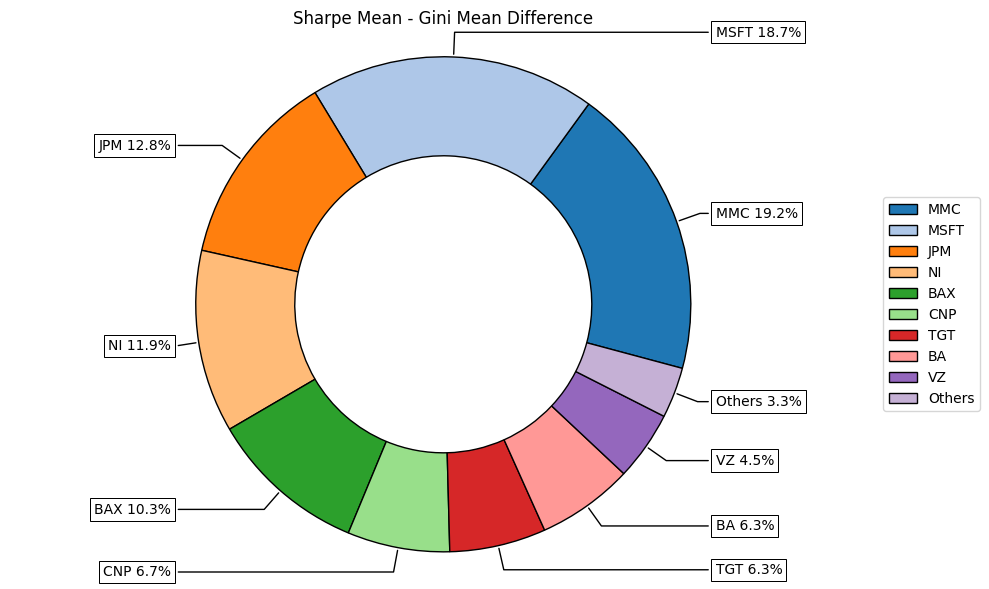

In [4]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Sharpe Mean - Gini Mean Difference', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

### 2.3 Calculate efficient frontier

In [5]:
points = 40 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
0,0.0000%,0.5623%,6.2424%,3.6036%,2.5003%,5.9907%,2.1213%,0.5564%,0.0000%,2.8849%,...,13.3312%,0.0000%,13.5220%,0.0000%,5.9868%,3.5223%,0.0000%,0.0000%,7.7084%,0.0000%
1,0.0000%,2.6351%,8.5329%,0.1578%,1.7348%,6.9226%,1.0169%,1.3279%,0.0000%,0.9273%,...,15.5658%,0.0000%,7.5752%,0.0000%,5.6197%,4.9981%,0.6957%,0.0000%,7.5181%,0.0000%
2,0.0000%,3.5388%,9.2738%,0.0000%,1.0967%,7.3450%,0.5205%,1.5837%,0.0000%,0.0000%,...,16.1378%,0.0000%,4.5049%,0.0000%,4.9905%,5.3909%,0.6507%,0.0000%,7.5296%,0.0000%
3,0.0000%,4.2617%,9.5406%,0.0000%,0.4751%,7.5106%,0.0001%,1.8512%,0.0000%,0.0000%,...,16.3694%,0.0000%,1.9201%,0.0000%,4.2690%,5.7209%,0.5878%,0.0000%,7.4286%,0.0001%
4,0.0000%,4.8795%,10.0916%,0.0000%,0.0001%,7.4023%,0.0000%,2.1489%,0.0000%,0.0000%,...,15.8406%,0.0000%,0.0000%,0.0000%,3.1049%,5.9647%,0.2538%,0.0000%,7.0291%,0.0000%


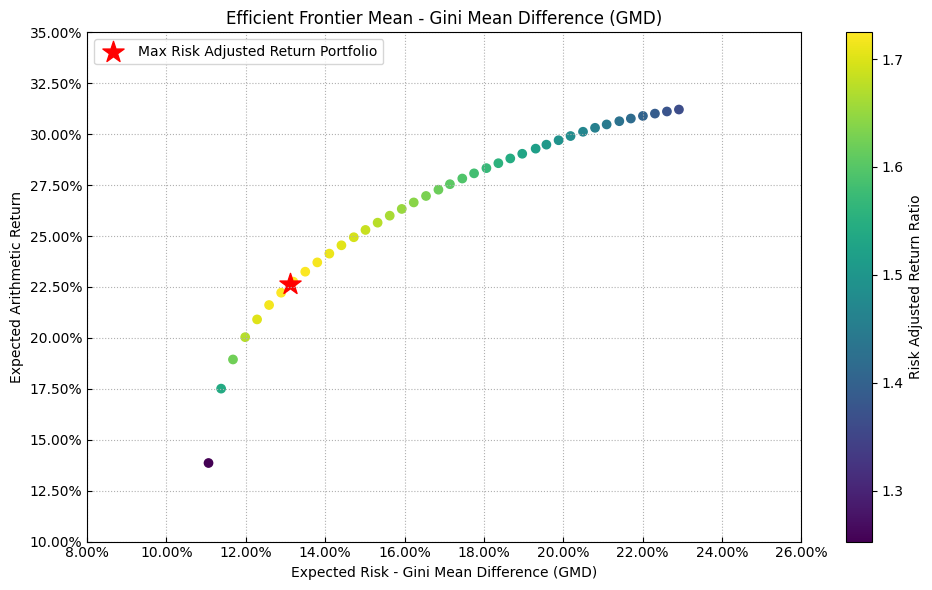

In [6]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

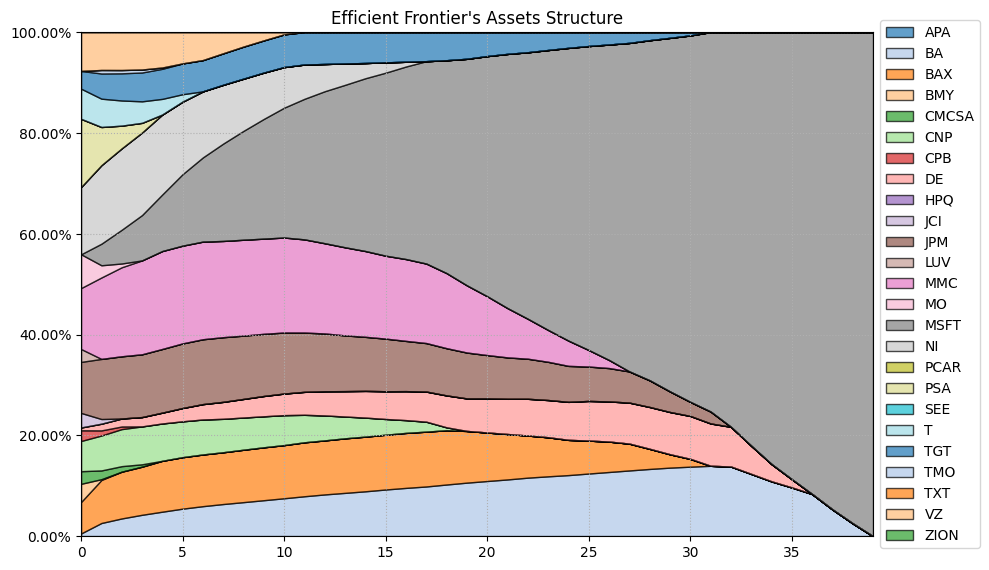

In [7]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

## 3. Estimating Risk Parity Portfolios for GMD

### 3.1 Calculating the risk parity portfolio for GMD.

In [8]:
b = None # Risk contribution constraints vector

w_rp = port.rp_optimization(model=model, rm=rm, rf=rf, b=b, hist=hist)

display(w_rp.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,2.3327%,3.1864%,4.1378%,4.1716%,3.9175%,5.1285%,4.7102%,3.0328%,2.8958%,3.6118%,...,6.5457%,2.9175%,6.6039%,3.5259%,4.5436%,3.8065%,3.5228%,2.9520%,5.1175%,3.0851%


### 3.2 Plotting portfolio composition

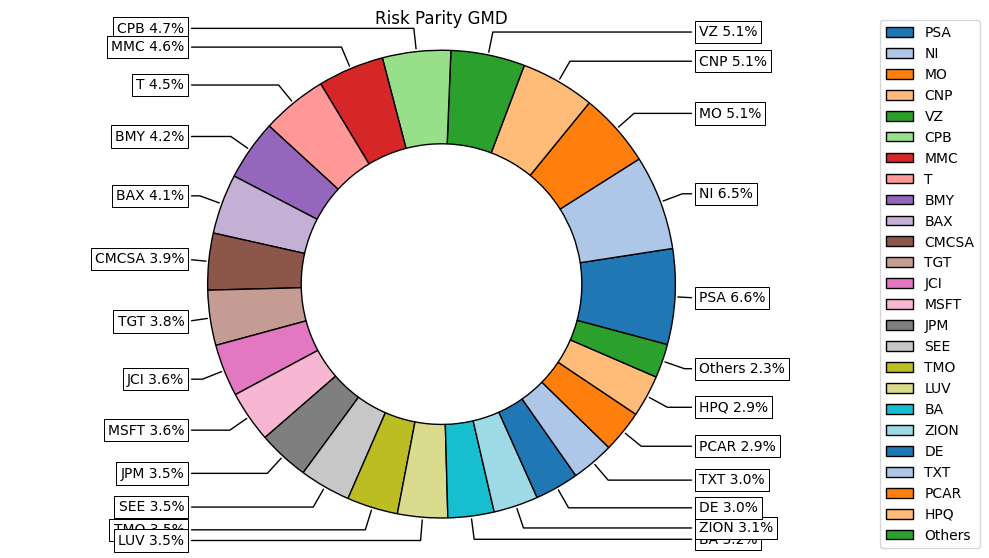

In [9]:
ax = rp.plot_pie(w=w_rp, title='Risk Parity GMD', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

### 3.3 Plotting Risk Composition

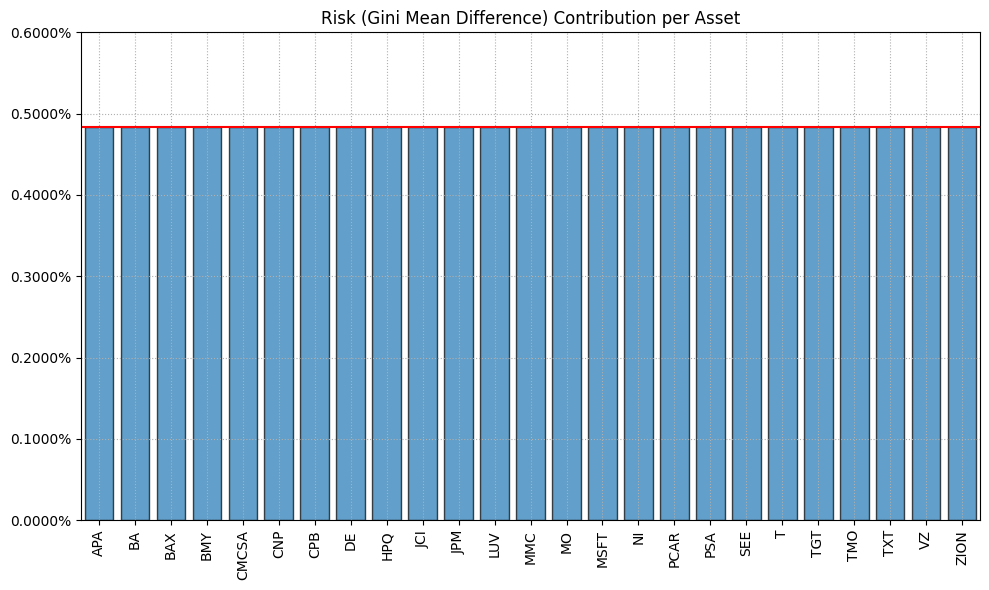

In [10]:
ax = rp.plot_risk_con(w_rp, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.05,
                      color="tab:blue", height=6, width=10, ax=None)